In [28]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [29]:
orgdata = pd.read_csv('市長辯論.csv')


In [30]:
orgdata.head()

,時間,內容,人物,標題
0,12:33,民進黨籍台北市長候選人陳時中上午10時在臉書發布祈福照片，希望討喜的紅色讓自己開運必勝。他也...,陳時中,陳時中辯論會前為自己祈福
1,12:41,國民黨籍台北市長候選人蔣萬安近中午12時在臉書貼文表示，下午2時的電視辯論會，相信各陣營都做...,蔣萬安,蔣萬安辯論會前向市民發表報告
2,12:48,辯論會前，無黨籍台北市長候選人黃珊珊在臉書貼文表示，直球對決、就在今天，走過24年的歷練，「...,黃珊珊,黃珊珊辯論會前強調「我準備好了」
3,13:02,下午1時民眾黨台北市長候選人黃珊珊率先進到辯論會會場，並接受媒體聯訪表示，沒有特別緊張的感覺...,黃珊珊,一襲白衣進場 黃珊珊：心情跟平常去議會差不多
4,13:20,蔣萬安穿著選戰期間一貫的藍色西裝，但換上太太特別準備的領帶，認為看起來比較有精神。對於辯論會...,蔣萬安,配戴太太準備的領帶 蔣萬安：選戰回到公共議題討論


In [31]:
orgdata['seg'] = ""
orgdata.head()

,時間,內容,人物,標題,seg
0,12:33,民進黨籍台北市長候選人陳時中上午10時在臉書發布祈福照片，希望討喜的紅色讓自己開運必勝。他也...,陳時中,陳時中辯論會前為自己祈福,
1,12:41,國民黨籍台北市長候選人蔣萬安近中午12時在臉書貼文表示，下午2時的電視辯論會，相信各陣營都做...,蔣萬安,蔣萬安辯論會前向市民發表報告,
2,12:48,辯論會前，無黨籍台北市長候選人黃珊珊在臉書貼文表示，直球對決、就在今天，走過24年的歷練，「...,黃珊珊,黃珊珊辯論會前強調「我準備好了」,
3,13:02,下午1時民眾黨台北市長候選人黃珊珊率先進到辯論會會場，並接受媒體聯訪表示，沒有特別緊張的感覺...,黃珊珊,一襲白衣進場 黃珊珊：心情跟平常去議會差不多,
4,13:20,蔣萬安穿著選戰期間一貫的藍色西裝，但換上太太特別準備的領帶，認為看起來比較有精神。對於辯論會...,蔣萬安,配戴太太準備的領帶 蔣萬安：選戰回到公共議題討論,


In [32]:
jieba.analyse.set_stop_words('noward.txt')
index = 0
for documents in orgdata['內容']:
    seg_list = jieba.analyse.extract_tags(documents, 15000)
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [33]:
jieba.load_userdict('./userdict.txt')

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

蔣
萬
安
表
示
，
很
高
興
能
參
與
辯
論
會
，
談
談
自
己
對
台
北
市
的
願
景
，
也
相
信
市
民
期
待
選
舉
主
軸
回
歸
公
共
議
題
討
論
。
這
次
辯
論
會
和
團
隊
盡
力
最
做
好
準
備
，
至
於
給
自
己
的
分
數
，
市
民
的
評
價
才
是
團
隊
最
關
心
的
。


In [34]:
orgdata['seg']

0     [民進黨籍, 候選人, 陳時中, 10, 臉書, 發布, 討喜, 紅色, 開運, 必勝, 電...
1     [台北市, 台北, 市民, 國民黨, 候選人, 蔣萬安, 12, 臉書, 貼文, 電視, 辯...
2     [辯論會, 黃珊珊, 無黨籍, 候選人, 臉書, 貼文, 直球, 對決, 走過, 24, 歷...
3     [辯論會, 候選人, 率先, 民眾黨, 黃珊珊, 進到, 會場, 媒體, 聯訪, 沒有, 特...
4     [選戰, 穿著, 蔣萬安, 期間, 一貫, 藍色, 西裝, 但換, 特別, 準備, 領帶, ...
5     [陳時中, 審查, 民意代表, 進場, 候選人, 西裝, 前進, 18, 徵和年, 輕人, ...
6     [蔣萬安, 萬元, 台北, 無論, 市長, 目標, 新命脈, 將連結, 內湖, 園區, 機會...
7     [什麼, 採購, 疫苗, 蔣萬安, 11, 沒有, 會議記錄, 合約, 30, 民間, 標得...
8     [30, 台灣, 令人困惑, 陳時中, 蔣萬安, 提問, 裝睡, 當市, 問題問, 次無法,...
9     [台灣, 應該, 面對, 歷史, 社會, 笑容, 市民, 陳時中, 幾日, 國片, 流麻溝1...
10    [黃珊珊, 台北市, 兩位, 戰力, 廉能, 人口老化, 不切, 進步, 說法, 里長, 議...
11    [大巨蛋, 馬英九, 遠雄, 弊案, 柯文哲, 市長, 黃珊珊, 國民黨, 蔣萬安, 已經,...
12    [補助, 陳時中, 蔣萬安, 公室, 黃珊珊, 提問, 化國, 擔任, 部長, 化辦, 只開...
13    [台北市, 溝通, 人口, 陳時中, 否決, 全國, 重點, 中央, 除籍, 居住, 不行,...
14    [問題, 台北市, 未來, 應該, 台北, 蔣萬安, 台電, 陳時中, 電力, 電器, 中央...
15    [陳時中, 車子, 水門, 黃珊珊, 認為, 內湖交通, 機場, 車流, 招標, 松山, 蔣...
16    [藍綠, 國民黨, 棄保, 市長, 民眾黨, 蔣萬安, 黃珊珊, 顏色, 討論, 改變, 超...
17    [社宅, 社會住宅, 輕人, 興建, 跳票, 包租, 代管, 台北市, 台北, 房價

In [35]:
date_split = orgdata['時間'].iloc[0].split('.')

In [36]:
date_split[0]

'12:33'

In [37]:
orgdata['TIME'] = ""
index = 0
for documents in orgdata['時間']:
    date_split = documents.split('.')
    orgdata['TIME'].iloc[index] = date_split[0]
    index += 1

In [38]:
orgdata.head()

,時間,內容,人物,標題,seg,TIME
0,12:33,民進黨籍台北市長候選人陳時中上午10時在臉書發布祈福照片，希望討喜的紅色讓自己開運必勝。他也...,陳時中,陳時中辯論會前為自己祈福,"[民進黨籍, 候選人, 陳時中, 10, 臉書, 發布, 討喜, 紅色, 開運, 必勝, 電...",12:33
1,12:41,國民黨籍台北市長候選人蔣萬安近中午12時在臉書貼文表示，下午2時的電視辯論會，相信各陣營都做...,蔣萬安,蔣萬安辯論會前向市民發表報告,"[台北市, 台北, 市民, 國民黨, 候選人, 蔣萬安, 12, 臉書, 貼文, 電視, 辯...",12:41
2,12:48,辯論會前，無黨籍台北市長候選人黃珊珊在臉書貼文表示，直球對決、就在今天，走過24年的歷練，「...,黃珊珊,黃珊珊辯論會前強調「我準備好了」,"[辯論會, 黃珊珊, 無黨籍, 候選人, 臉書, 貼文, 直球, 對決, 走過, 24, 歷...",12:48
3,13:02,下午1時民眾黨台北市長候選人黃珊珊率先進到辯論會會場，並接受媒體聯訪表示，沒有特別緊張的感覺...,黃珊珊,一襲白衣進場 黃珊珊：心情跟平常去議會差不多,"[辯論會, 候選人, 率先, 民眾黨, 黃珊珊, 進到, 會場, 媒體, 聯訪, 沒有, 特...",13:02
4,13:20,蔣萬安穿著選戰期間一貫的藍色西裝，但換上太太特別準備的領帶，認為看起來比較有精神。對於辯論會...,蔣萬安,配戴太太準備的領帶 蔣萬安：選戰回到公共議題討論,"[選戰, 穿著, 蔣萬安, 期間, 一貫, 藍色, 西裝, 但換, 特別, 準備, 領帶, ...",13:20


In [39]:
orgdata.to_csv("誰會當選.csv", index=False)

In [40]:
Counter(orgdata['TIME']).keys()

dict_keys(['12:33', '12:41', '12:48', '13:02', '13:20', '13:29', '14:09', '14:16', '14:21', '14:28', '14:35', '14:36', '15:01', '15:15', '15:21', '15:26', '15:30', '15:35', '15:45', '16:00', '16:05', '16:10', '16:20', '16:22', '16:26'])

In [41]:
words = list(orgdata['人物'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [42]:
df = [show_key, show_values]

In [43]:
result = pd.concat(df, axis=1)
result.columns = ['人物', '次數']
result

,人物,次數
0,陳時中,6
1,蔣萬安,6
2,黃珊珊,5
3,ALL,8


In [44]:
import plotly.express as px
import pandas as pd

In [45]:
show_sub = orgdata['人物']=='黃珊珊'
subdata = orgdata[show_sub]
subdata

,時間,內容,人物,標題,seg,TIME
2,12:48,辯論會前，無黨籍台北市長候選人黃珊珊在臉書貼文表示，直球對決、就在今天，走過24年的歷練，「...,黃珊珊,黃珊珊辯論會前強調「我準備好了」,"[辯論會, 黃珊珊, 無黨籍, 候選人, 臉書, 貼文, 直球, 對決, 走過, 24, 歷...",12:48
3,13:02,下午1時民眾黨台北市長候選人黃珊珊率先進到辯論會會場，並接受媒體聯訪表示，沒有特別緊張的感覺...,黃珊珊,一襲白衣進場 黃珊珊：心情跟平常去議會差不多,"[辯論會, 候選人, 率先, 民眾黨, 黃珊珊, 進到, 會場, 媒體, 聯訪, 沒有, 特...",13:02
10,14:35,黃珊珊表示，台北這8年進步有目共睹、不容抹煞，兩位說法好像在否定台北市里長及議員和市民8年的...,黃珊珊,黃珊珊申論抨對手政策不可行 新市長需要即戰力,"[黃珊珊, 台北市, 兩位, 戰力, 廉能, 人口老化, 不切, 進步, 說法, 里長, 議...",14:35
19,16:00,黃珊珊首先指出，感謝陳時中肯定水門要有SOP，以及蔣萬安說應該不分藍綠，這些都是我們台北市政...,黃珊珊,黃珊珊結論：非藍非綠 這是一場價值選擇,"[藍綠, 黃珊珊, 當選, 市長, 兩黨, 第二天, 感謝, 陳時中, 水門, SOP, 蔣...",16:00
22,16:20,黃珊珊先表示，遺憾其他兩位候選人實問虛答，例如台北市電問題是現在進行式，沒有具體回答。許多提...,黃珊珊,黃珊珊會後記者會：遺憾實問虛答,"[黃珊珊, 已經, 交給, 台北市, 遺憾, 兩位, 候選人, 實問, 虛答, 電問題, 現...",16:20


In [46]:
type(subdata['seg'])

pandas.core.series.Series

In [47]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [48]:
subdata_seg_list

[['辯論會',
  '黃珊珊',
  '無黨籍',
  '候選人',
  '臉書',
  '貼文',
  '直球',
  '對決',
  '走過',
  '24',
  '歷練',
  '準備',
  '強調',
  '選戰',
  '現在',
  '烏賊',
  '戰佔據',
  '新聞',
  '告訴',
  '選民什麼',
  '專業',
  '價值',
  '版面',
  '今天',
  '收看',
  '台北市',
  '看到',
  '表示'],
 ['辯論會',
  '候選人',
  '率先',
  '民眾黨',
  '黃珊珊',
  '進到',
  '會場',
  '媒體',
  '聯訪',
  '沒有',
  '特別',
  '緊張',
  '感覺',
  '議會',
  '待會',
  '申論將',
  '問題',
  '開火',
  '高端疫苗',
  '爭議',
  '抨擊',
  '民進黨籍',
  '陳時中',
  '並感謝',
  '盡心',
  '舉行',
  '市府',
  '防疫',
  '台北市',
  '同仁',
  '聚焦',
  '市政',
  '安心',
  '平常',
  '差不多',
  '再度',
  '下午',
  '才能',
  '接受',
  '表示'],
 ['黃珊珊',
  '台北市',
  '兩位',
  '戰力',
  '廉能',
  '人口老化',
  '不切',
  '進步',
  '說法',
  '里長',
  '議員',
  '並回擊',
  '政見',
  '公廁',
  '換裝',
  '免治馬桶',
  '實際',
  '實務上',
  '預約',
  '公車',
  '更知',
  '大撒幣',
  '將嚴',
  '重破壞',
  '財政紀律',
  '強調',
  '需重視',
  '極端',
  '氣候',
  '危機',
  '正義',
  '市長',
  '應要',
  '具備',
  '解決',
  '問題',
  '時間',
  '實習',
  '針對',
  '計畫',
  '雙軸線',
  '容積',
  '獎勵',
  '申辦',
  '2038',
  '年亞運',
  '2050',
  '減零碳排',
  '目標',
  '認為',
  '即戰力',
  '

In [49]:
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat)

In [50]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [54]:
import numpy as np
mask = np.array(Image.open("unnamed.png"))
font = "C:\Windows\Fonts\MSJH.TTC"

In [55]:
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

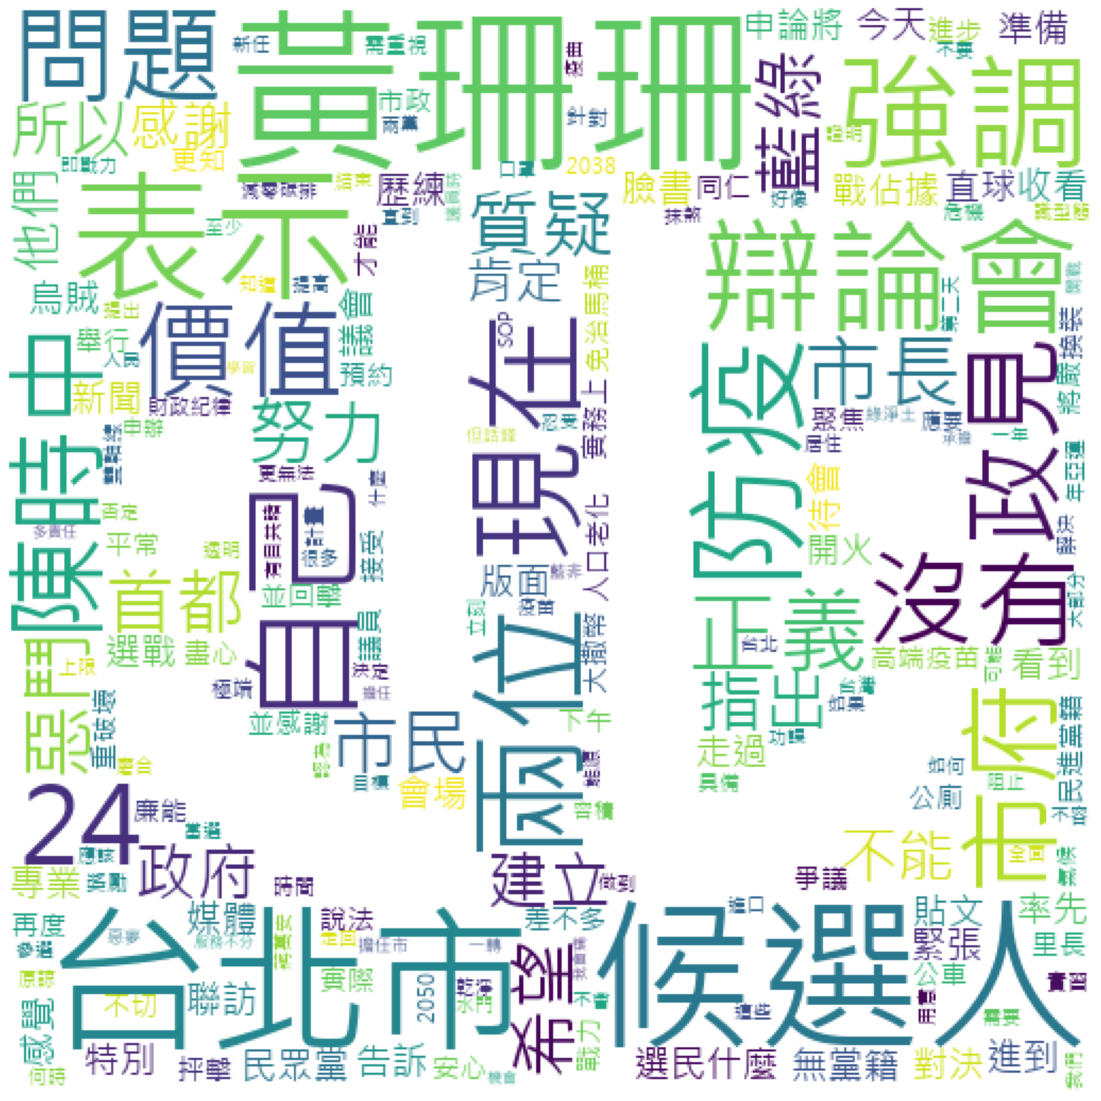

In [56]:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()